In [41]:
# importing
import sys
import numpy as np
import matplotlib.pylab as plt

In [42]:
# Muon decay, for ease of code, microseconds will be the standard
tau = 2.2

In [43]:
# BOX METHOD - WILL BE USING THIS
   # Produce probability density function
def exp_pdf(x,tau):
    pdf_val = (1/tau)*np.exp(-x/tau)
    return pdf_val

In [55]:
# Create a simulation function that scales to whatever value of tau that is needed, between 0 and upper limit
def mu_sims(runs, tau, upperlim):
        # Create list of pdf results
    pdf_list = []
        # Create values for upper and lower limits required by the box random generator
    l_limit = 0
    h_limit = 1
        # find f_max by taking exponent at maximum and multiplying by 1.1
        # 1.1 chosen arbitrarily as it makes it larger than max value of f
    f_max = exp_pdf(0,tau) * 1.1

        # Create N random muon decays across 10 microseconds
    while (len(pdf_list) < runs):
            # generate random number within our pdf range scale between 0 and our upperlimit (of 10)
        x1 = np.random.uniform(low = l_limit, high = h_limit*upperlim)
            # Apply our pdf
        y1 = exp_pdf(x1,tau)
            # generate second random number scale between 0 and our f_max
        y2 = np.random.uniform(low = l_limit, high = h_limit*f_max)

            # Check if y2 < y1. If so, add to list
        if (y2 < y1):
            pdf_list.append(x1)
        else:
            continue;
            
    return pdf_list
   
        

The mean for our 1000 simulated muon decays is given as 2.136us.
This (should be) in close agreement with our tau value of 2.2us.


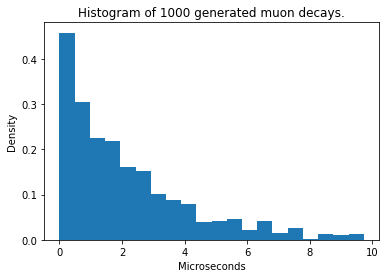

In [56]:
# Run our simulation for 1000 runs
pdf_list = mu_sims(1000, tau, 10)

    # Calculate the mean which gives the estimate of tau
print("The mean for our {} simulated muon decays is given as {:.3f}us.\nThis (should be) in close agreement with our tau value of {}us.".format(len(pdf_list),np.mean(pdf_list),tau))
    # Print histogram of pdf_list and describe the results
plt.title("Histogram of 1000 generated muon decays.")
plt.xlabel("Microseconds")
plt.ylabel("Density")
plt.hist(pdf_list, bins = 20, density = True)
plt.show()

The mean is given as 2.055us, which is in close agreement with our tau value.


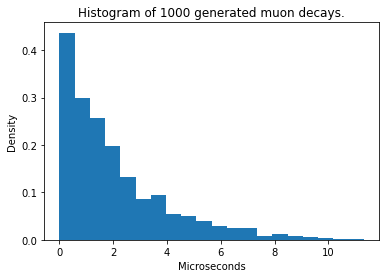

In [57]:
# NUMPY - THIS METHOD WONT BE USED AS I WANT TO RESTRICT WITHIN RANGE 0->10

    # Use numpy to generate exponential distribution for 1000 points.
edist = np.random.exponential(tau,1000)

    # Calculate the mean which gives the estimate of tau
print("The mean is given as {:.3f}us, which is in close agreement with our tau value.".format(np.mean(edist)))
    # Plot histogram of distribution
plt.title("Histogram of 1000 generated muon decays.")
plt.xlabel("Microseconds")
plt.ylabel("Density")
plt.hist(edist, bins = 20, density = True)
plt.show()

## The value isn't quite the same, and as is referenced in the sheet is always a little lower than the expected value for decay.

## Due to the random nature of the test, it isn't too surprising that the value isn't perfectly equal to 2.2us, but the reason for it always being lower is that the probability of achieving a lower lifetime is higher than achieving a larger one, so the probability (if it is inaccurate) will shift preferably to lower values.



In [58]:
# Repeat the whole experiment 500 times and calculate the estimate of tau for each

    # Tau esimate array
tau_est = []

for i in range(500):
        # Run simulation
    pdf_list = mu_sims(1000, tau, 10)
        # Append to list
    tau_est.append(np.mean(pdf_list))



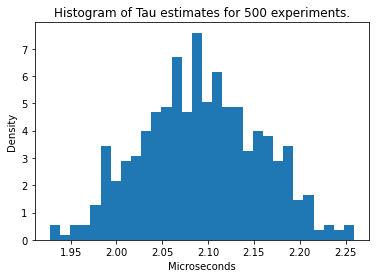

In [60]:
# Plot 
plt.title("Histogram of Tau estimates for 500 experiments.")
plt.xlabel("Microseconds")
plt.ylabel("Density")
plt.hist(tau_est, bins = 30, density = True)
plt.show()

## What did we learn from this distribution?

It appears to be gaussian in its distribution.
Believing this, we can determine that 3 sigma from the centre is about 2.25 - 2.10 = 0.15 (This is done just by eye on this run, can be done via codeas well.), which gives a standard deviation of about 0.05. This means our results are (at a minimum) 2 sigma from the true result (assuming 2.10 is the mean) which shows a general lack of accuracy. The small value for sigma demonstrates a high precision however.

## Estimating the true lifetime from any single experiment is difficult. It's clear from the above graph that at the very least we can get to within a range of 0.3 or less around the true value (from 1.9us to 2.3us) from a single experiment

## METHOD BIAS

